In [16]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
# Read data from CSV and remove unnecessary columns
cna15 = pd.read_csv('CNA15-PopPerYearByAgeGroup.csv')
cna15.drop(columns=['Sex', 'Statistic', 'UNIT'])
cna15.head()

# We will need separate models for each age group
age_groups = np.array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years', '85 years and over'])
models = {}

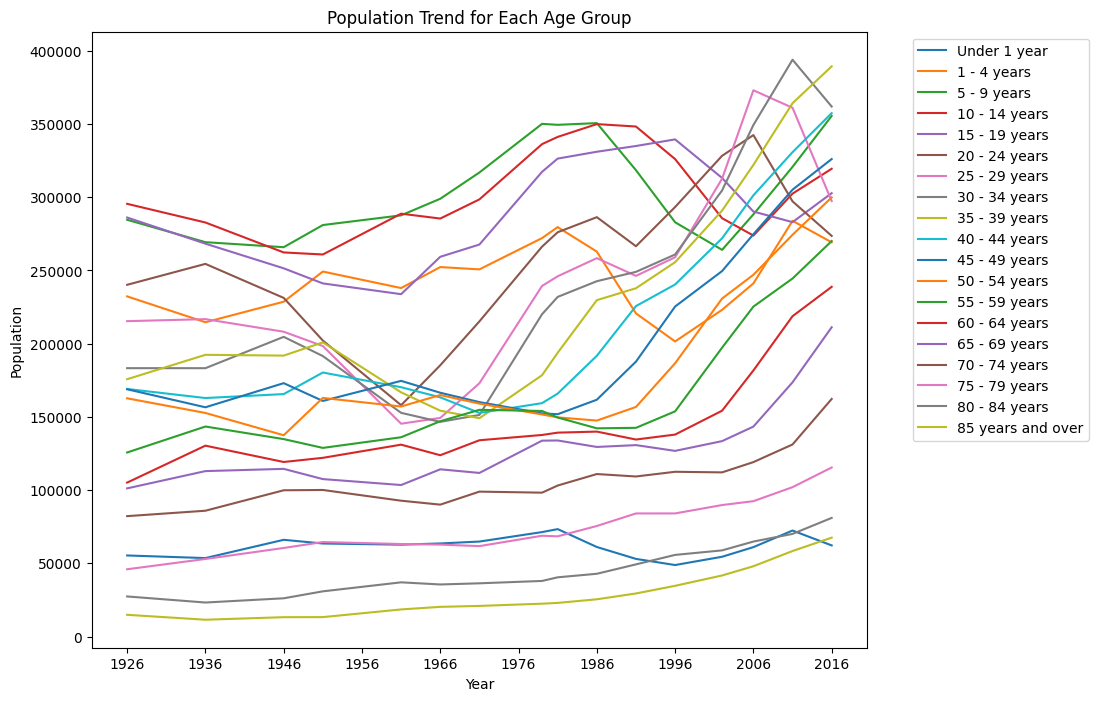

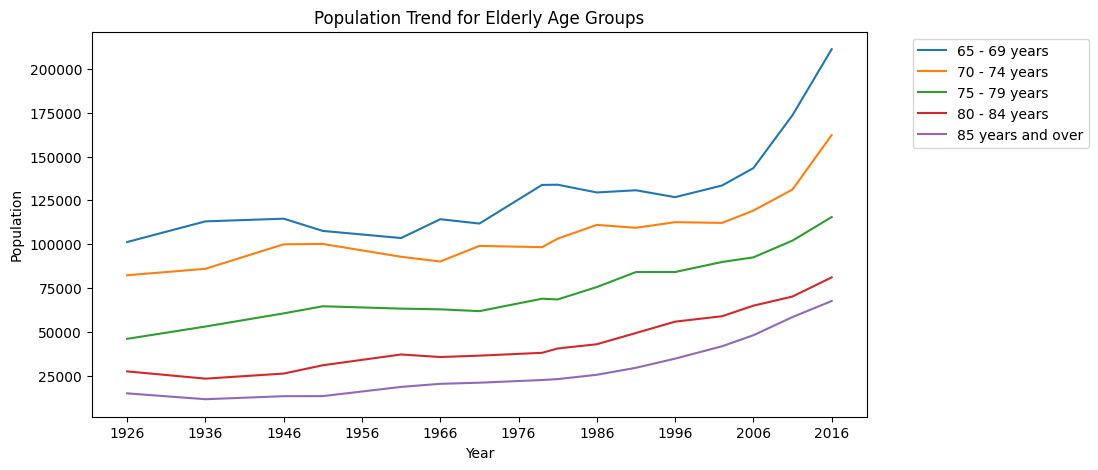

In [18]:
# Data Visualisation

# Visualising population trend for each age group
plt.figure(figsize=(10, 8))

# Plotting each age group's population
for ag in age_groups:
    plt.plot(cna15['Year'], cna15[ag], label=ag)

# Custom tick labels to show every 10th year
x_ticks = [1926, 1936, 1946, 1956, 1966, 1976, 1986, 1996, 2006, 2016]
plt.xticks(x_ticks)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for Each Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualising population trend for elderly age groups
plt.figure(figsize=(10, 5))

for ag in age_groups[-5:]:
    plt.plot(cna15['Year'], cna15[ag], label=ag)
    
plt.xticks(x_ticks)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for Elderly Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
# To be used in evaluation
r_squareds = []

# Fit each model with a corresponding age group
for ag in age_groups:
    X = cna15[['Year']]
    y = cna15[ag]
    
    model = LinearRegression()
    model.fit(X, y)
    
    r_squareds.append(model.score(X, y))
    models[ag] = model
    
print('X shapes:', cna15[['Year']].shape)
print('y shapes:', cna15[age_groups[0]].shape)

X shapes: (16, 1)
y shapes: (16,)


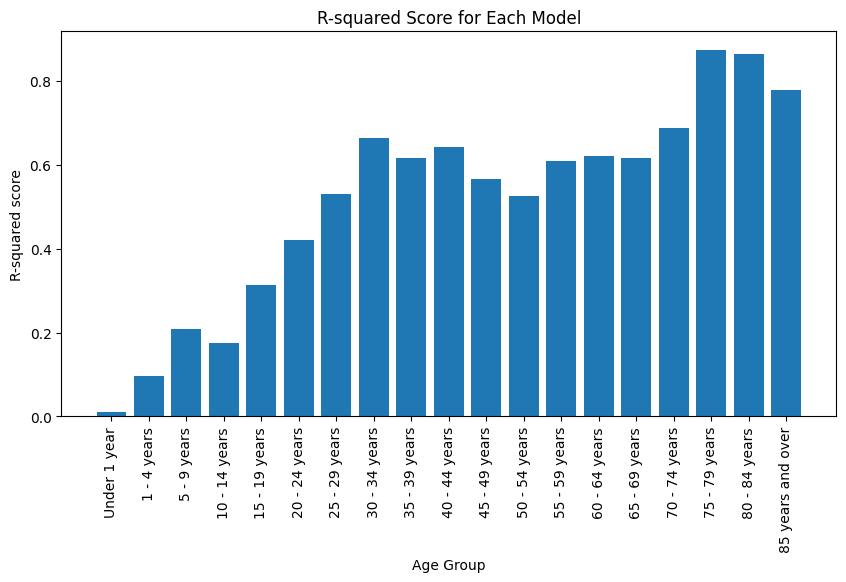

Average r-squared score: 0.516934705413154
Average r-squared score for elderly populations: 0.7639195463723891


In [20]:
# Visualising each model's performance
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), r_squareds)
plt.title('R-squared Score for Each Model')
plt.ylabel('R-squared score')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_r_score = sum(r_squareds) / len(r_squareds)
print('Average r-squared score:', avg_r_score)

avg_r_score = sum(r_squareds[-5:]) / 5
print('Average r-squared score for elderly populations:', avg_r_score)

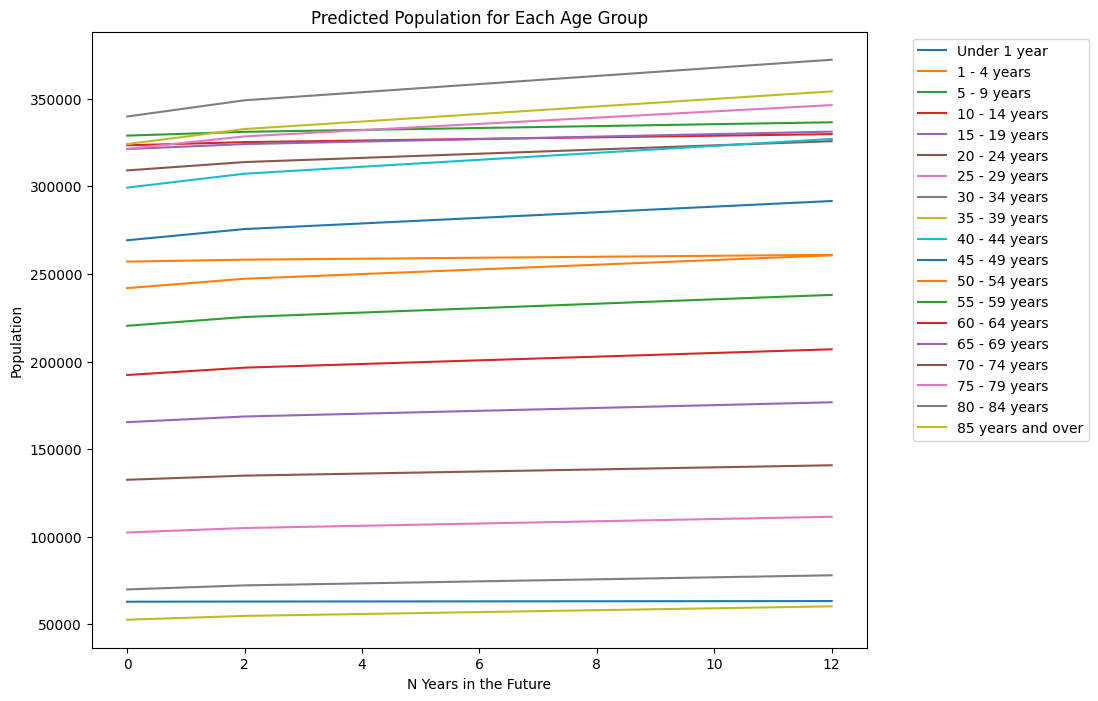

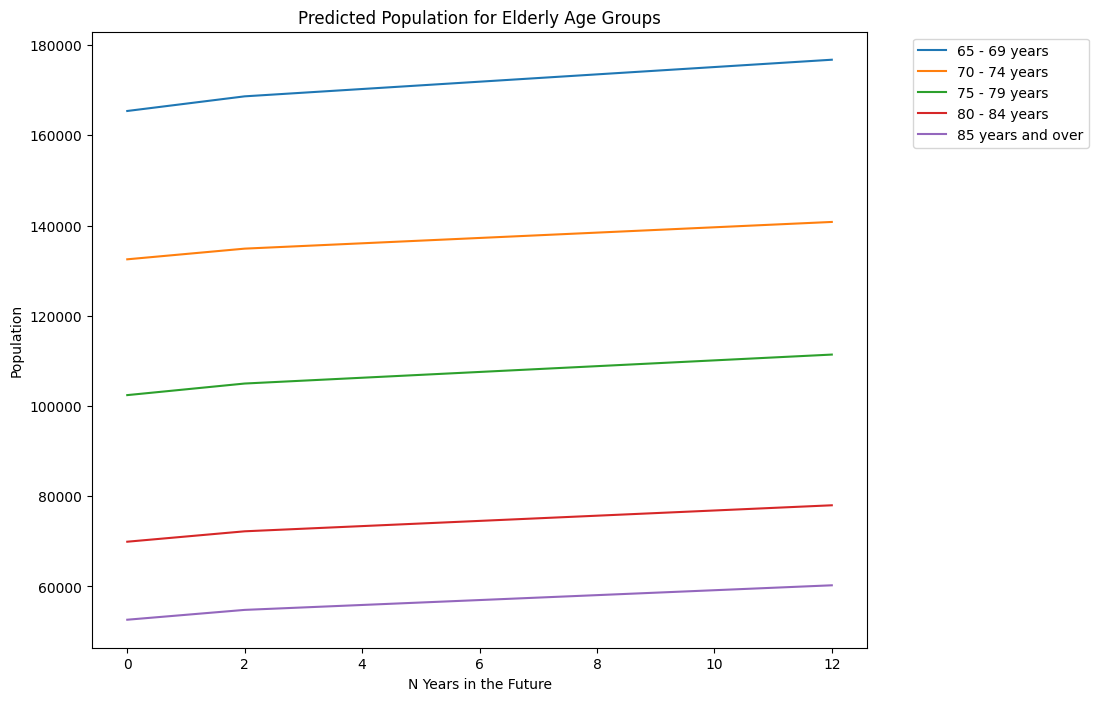

In [21]:
# Predicting future population using each age group's model
years_to_predict = pd.DataFrame({'Year': [2020, 2022, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034]})
predictions = {}

for ag in age_groups:
    predictions[ag] = models[ag].predict(years_to_predict)

# Predicted population change for each age group
plt.figure(figsize=(10, 8))

for ag in age_groups:
    plt.plot(predictions[ag], label=ag)

plt.xlabel('N Years in the Future')
plt.ylabel('Population')
plt.title('Predicted Population for Each Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Predicted population change for elderly age groups
plt.figure(figsize=(10, 8))

for ag in age_groups[-5:]:
    plt.plot(predictions[ag], label=ag)

plt.xlabel('N Years in the Future')
plt.ylabel('Population')
plt.title('Predicted Population for Elderly Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
# # Appending predictions to the original data
# predictions_df = pd.DataFrame(predictions, index=years_to_predict['Year'])
# predictions_df.reset_index(inplace=True)
# cna15_with_preds = pd.concat([cna15, predictions_df], ignore_index=True)
# 
# # Visualising data with predictions appended
# x_ticks += [2022, 2028, 2034]
# 
# # Every age group
# plt.figure(figsize=(10, 8))
# 
# for ag in age_groups:
#     plt.plot(cna15_with_preds['Year'], cna15_with_preds[ag], label=ag)
# 
# plt.xticks(x_ticks)
# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.title('Predicted Population Trend for Each Age Group')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
# 
# # Elderly age groups
# plt.figure(figsize=(10, 5))
# 
# for ag in age_groups[-5:]:
#     plt.plot(cna15_with_preds['Year'], cna15_with_preds[ag], label=ag)
#     
# plt.xticks(x_ticks)
# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.title('Predicted Population Trend for Elderly Age Groups')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()